<a href="https://colab.research.google.com/github/AliSajadian/RNN_weather_forecast/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Data Definition

In [115]:
zip_path = tf.keras.utils.get_file(
    fname='jena_climate_2009_2016.csv.zip',
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [141]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [142]:
df.shape

(420551, 15)

In [143]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


## Data Preprocessing

#### Narrow data to hourly temprotures instread of every 10 mkinutes

In [144]:
df = df[5::6]
df.shape

(70091, 15)

In [145]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:7]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8


<Axes: xlabel='Date Time'>

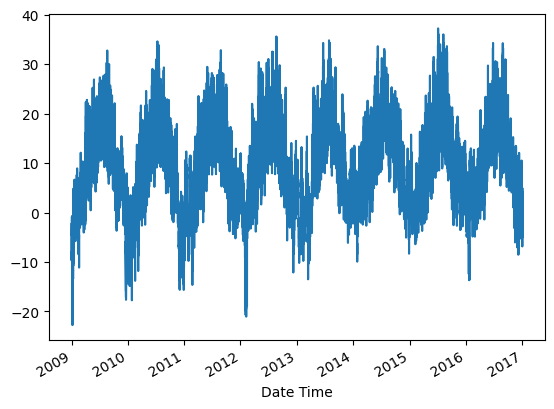

In [146]:
tmp = df['T (degC)']
tmp.plot()

In [ ]:
# [[[1],[2],[3],[4],[5]]] [6]
# [[[2],[3],[4],[5],[6]]] [7]
# [[[3],[4],[5],[6],[7]]] [8]

In [147]:
def def_to_x_y(df, window_size=5):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np)-window_size):
      row = [[a] for a in df_as_np[i:i+window_size]]
      x.append(row)
      label = df_as_np[i+window_size]
      y.append(label)
    return np.array(x), np.array(y)


In [148]:
window_size = 5
x, y = def_to_x_y(tmp, window_size)
x.shape, y.shape

((70086, 5, 1), (70086,))

In [149]:
x_train, y_train = x[:60000], y[:60000]
x_val, y_val = x[60000:65000], y[60000:65000]
x_test, y_test = x[65000:], y[65000:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

#### Create LSTM Model

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_32 (Dense)            (None, 8)                 520       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [153]:
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6454 - root_mean_squared_error: 0.8034 - val_loss: 0.4977 - val_root_mean_squared_error: 0.7055
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6442 - root_mean_squared_error: 0.8026 - val_loss: 0.4940 - val_root_mean_squared_error: 0.7028
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6422 - root_mean_squared_error: 0.8014 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6412 - root_mean_squared_error: 0.8008 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6392 - root_mean_squared_error: 0.7995 - val_loss: 0.4982 - val_root_mean_squared_error: 0.7058
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6381 - root_mean_squared_error: 0.7988 - val_

In [154]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

#### Evaluation

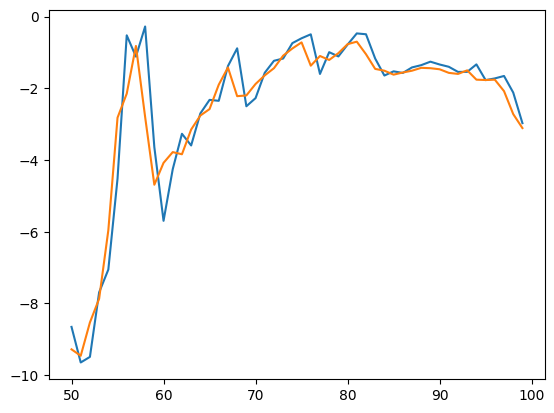

In [155]:
import matplotlib.pyplot as plt
plt.plot(train_results['train predictions'][50:100])
plt.plot(train_results['actuals'][50:100])

In [129]:
val_predtions = model1.predict(x_val).flatten()
val_results = pd.DataFrame(data={'val predictions': val_predtions, 'actuals': y_val})
val_results

157/157 [==============================] - 1s 3ms/step


,val predictions,actuals
0,15.533327,14.02
1,13.259400,13.67
2,13.011272,12.27
3,11.477781,11.19
4,10.370544,10.85
...,...,...
4995,17.385157,18.27
4996,17.329245,17.85
4997,17.154488,16.65
4998,15.823523,15.85


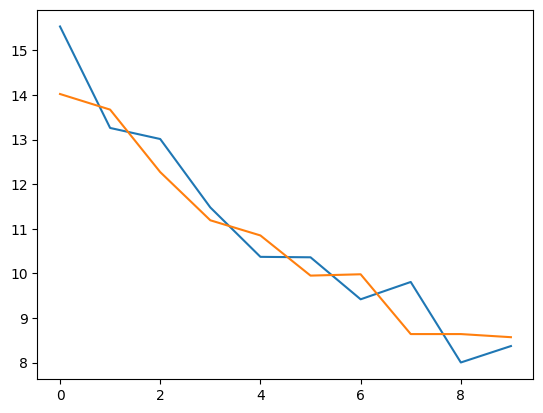

In [130]:
plt.plot(val_results['val predictions'][:10])
plt.plot(val_results['actuals'][:10])

In [131]:
test_predtions = model1.predict(x_test).flatten()
test_results = pd.DataFrame(data={'test predictions': test_predtions, 'actuals': y_test})
test_results

159/159 [==============================] - 0s 3ms/step


,test predictions,actuals
0,14.365030,13.99
1,13.213705,13.46
2,12.827949,12.93
3,12.430296,12.43
4,11.986709,12.17
...,...,...
5081,-0.939768,-0.98
5082,-1.346081,-1.40
5083,-1.656191,-2.75
5084,-2.949732,-2.89


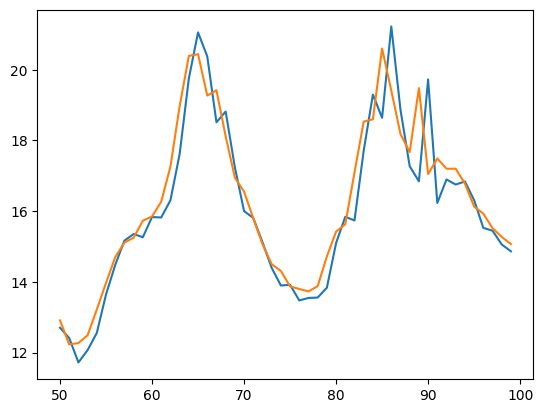

In [132]:
plt.plot(test_results['test predictions'][50:100])
plt.plot(test_results['actuals'][50:100])

In [156]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, x, y, start=0, end=100):
  predictions = model.predict(x).flatten()
  df = pd.DataFrame(data={'predictions': predictions, 'actuals': y})
  plt.plot(df['predictions'][start:end])
  plt.plot(df['actuals'][start:end])

  return df, mse(y, predictions)

159/159 [==============================] - 1s 3ms/step


(      predictions  actuals
 0       14.281928    13.99
 1       13.140066    13.46
 2       12.770814    12.93
 3       12.383598    12.43
 4       11.949300    12.17
 ...           ...      ...
 5081    -0.987966    -0.98
 5082    -1.553741    -1.40
 5083    -1.763863    -2.75
 5084    -3.069893    -2.89
 5085    -3.213630    -3.93
 
 [5086 rows x 2 columns],
 0.6662562015601535)

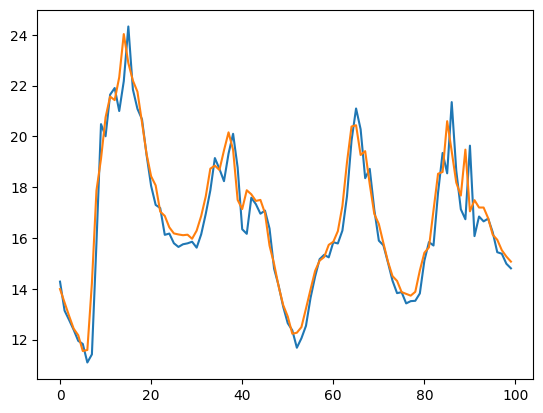

In [158]:
plot_predictions(model, x_test, y_test)

#### RNN

In [159]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 8)                 2056      
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [161]:
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 5.5472 - root_mean_squared_error: 2.3552 - val_loss: 0.9823 - val_root_mean_squared_error: 0.9911
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0778 - root_mean_squared_error: 1.0382 - val_loss: 0.6773 - val_root_mean_squared_error: 0.8230
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8050 - root_mean_squared_error: 0.8972 - val_loss: 0.5644 - val_root_mean_squared_error: 0.7512
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7133 - root_mean_squared_error: 0.8446 - val_loss: 0.5310 - val_root_mean_squared_error: 0.7287
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6833 - root_mean_squared_error: 0.8266 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7099
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6723 - root_mean_squared_error: 0.8199 - val_loss: 0

#### GRU

In [162]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                12864     
                                                                 
 dense_36 (Dense)            (None, 8)                 520       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [164]:
model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 59.3530 - root_mean_squared_error: 7.7041 - val_loss: 2.3765 - val_root_mean_squared_error: 1.5416
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 4.3954 - root_mean_squared_error: 2.0965 - val_loss: 0.7070 - val_root_mean_squared_error: 0.8409
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.2053 - root_mean_squared_error: 1.0978 - val_loss: 0.5345 - val_root_mean_squared_error: 0.7311
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7691 - root_mean_squared_error: 0.8770 - val_loss: 0.5068 - val_root_mean_squared_error: 0.7119
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6777 - root_mean_squared_error: 0.8232 - val_loss: 0.4929 - val_root_mean_squared_error: 0.7021
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6540 - root_mean_squared_error: 0.8087 - val_

#### Add time variate (Day sin, Day cos, Year sin, Year cos)

In [169]:
tmp_df = pd.DataFrame({'temperture': tmp})
tmp_df['seconds'] = tmp_df.index.map(pd.Timestamp.timestamp)
tmp_df

,temperture,seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [170]:
day = 60 * 60 * 24
year = 365.2425 * day

tmp_df['Day sin'] = np.sin(tmp_df['seconds'] * (2 * np.pi / day))
tmp_df['Day cos'] = np.cos(tmp_df['seconds'] * (2 * np.pi / day))
tmp_df['Year sin'] = np.sin(tmp_df['seconds'] * (2 * np.pi / year))
tmp_df['Year cos'] = np.cos(tmp_df['seconds'] * (2 * np.pi / year))

tmp_df.head()

,temperture,seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [172]:
tmp_df = tmp_df.drop('seconds', axis=1)
tmp_df.head()

,temperture,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [174]:
def def_to_x_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np)-window_size):
      row = [r for r in df_as_np[i:i+window_size]]
      x.append(row)
      label = df_as_np[i+window_size][0]
      y.append(label)
    return np.array(x), np.array(y)

In [175]:
x2, y2 = def_to_x_y2(tmp_df)
x2.shape, y2.shape

((70085, 6, 5), (70085,))

In [176]:
x2_train, y2_train = x2[:60000], y2[:60000]
x2_val, y2_val = x2[60000:65000], y2[60000:65000]
x2_test, y2_test = x2[65000:], y2[65000:]
x2_train.shape, y2_train.shape, x2_val.shape, y2_val.shape, x2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

#### Normalization

In [177]:
tmp_training_mean = np.mean(x2_train[:, :, 0])
tmp_training_std = np.std(x2_train[:, :, 0])

def preprocessing(x):
  x[:, :, 0] = (x[:, :, 0] - tmp_training_mean) / tmp_training_std
  return x

In [178]:
preprocessing(x2_train)
preprocessing(x2_val)
preprocessing(x2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

#### Model Definition

In [179]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17920     
                                                                 
 dense_38 (Dense)            (None, 8)                 520       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [180]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [181]:
model4.fit(x2_train, y2_train, validation_data=(x2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 156.6729 - root_mean_squared_error: 12.5169 - val_loss: 74.7960 - val_root_mean_squared_error: 8.6485
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 151.7406 - root_mean_squared_error: 12.3183 - val_loss: 72.3128 - val_root_mean_squared_error: 8.5037
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 148.1104 - root_mean_squared_error: 12.1701 - val_loss: 69.8850 - val_root_mean_squared_error: 8.3597
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 144.5531 - root_mean_squared_error: 12.0230 - val_loss: 67.5572 - val_root_mean_squared_error: 8.2193
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 141.0680 - root_mean_squared_error: 11.8772 - val_loss: 65.2594 - val_root_mean_squared_error: 8.0783
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 137.6624 - root_mean_squa

159/159 [==============================] - 1s 5ms/step


(      predictions  actuals
 0        1.843748    13.46
 1        1.843748    12.93
 2        1.843748    12.43
 3        1.843748    12.17
 4        1.843748    11.55
 ...           ...      ...
 5080     0.244425    -0.98
 5081    -1.324072    -1.40
 5082    -2.267705    -2.75
 5083    -2.991497    -2.89
 5084    -3.573101    -3.93
 
 [5085 rows x 2 columns],
 185.0942714780597)

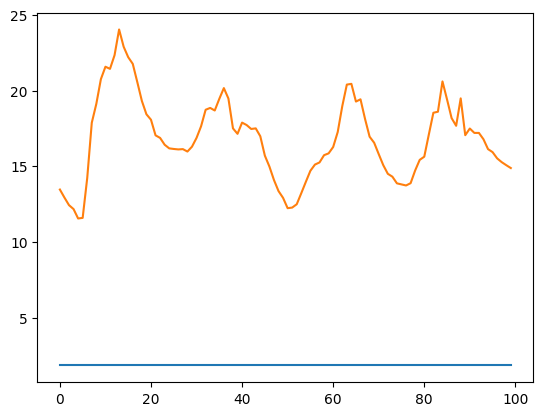

In [182]:
plot_predictions(model4, x2_test, y2_test)

In [184]:
p_tmp_df = pd.concat([df['p (mbar)'], tmp_df], axis=1)
p_tmp_df.head()

,p (mbar),temperture,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [185]:
def def_to_x_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np)-window_size):
      row = [r for r in df_as_np[i:i+window_size]]
      x.append(row)
      label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
      y.append(label)
    return np.array(x), np.array(y)

In [186]:
x3, y3 = def_to_x_y3(p_tmp_df)
x3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [187]:
x3_train, y3_train = x3[:60000], y3[:60000]
x3_val, y3_val = x3[60000:65000], y3[60000:65000]
x3_test, y3_test = x3[65000:], y3[65000:]
x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape, x3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [188]:
p_train_mean3 = np.mean(x3_train[:, :, 0])
p_train_std3 = np.std(x3_train[:, :, 0])

tmp_train_mean3 = np.mean(x3_train[:, :, 1])
tmp_train_std3 = np.std(x3_train[:, :, 1])

def preprocessing3(x):
  x[:, :, 0] = (x[:, :, 0] - p_train_mean3) / p_train_std3
  x[:, :, 1] = (x[:, :, 1] - tmp_train_mean3) / tmp_train_std3

def preprocessing3_output(y):
  y[:, 0] = (y[:, 0] - p_train_mean3) / p_train_std3
  y[:, 1] = (y[:, 1] - tmp_train_mean3) / tmp_train_std3
  return y

In [189]:
preprocessing3(x3_train)
preprocessing3(x3_val)
preprocessing3(x3_test)

In [190]:
preprocessing3_output(y3_train)
preprocessing3_output(y3_val)
preprocessing3_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [191]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                18176     
                                                                 
 dense_40 (Dense)            (None, 8)                 520       
                                                                 
 dense_41 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [193]:
model5.fit(x3_train, y3_train, validation_data=(x3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.1311 - root_mean_squared_error: 0.3621 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0106 - root_mean_squared_error: 0.1030 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0064 - root_mean_squared_error: 0.0797 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - 